In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import FloatSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

# Eksaktna integracija

In [3]:
def eksaktno(s, A_0 = 1,
             A_star_0 = 0 ,
             B_0 = 0 ,
             p = 10 ,
             
             ND=100, #Čas opazovanja
             TS=0.5 #Korak
            ):
    INPUT = np.array([A_0, A_star_0, B_0])
    q = 1000 * p
    r = q * A_0 * s
    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((3))
        V = INP
        Y[0] = -p * V[0]**2 + q * V[0] * V[1]
        Y[1] =  p * V[0]**2 - q * V[0] * V[1] - r * V[1]
        Y[2] =  r * V[1]
        return Y   # For odeint

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    return RES, t_range


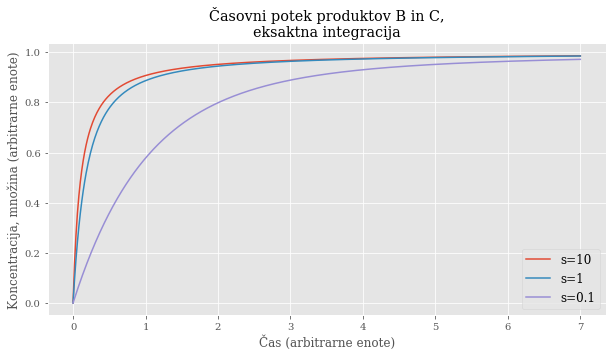

In [4]:
plt.figure(figsize=(10,5))
sji = [10, 1, .1]
for s in sji:
    res, t_range = eksaktno(s, ND=7, TS=0.01)
    plt.plot(t_range, res[:,2], label="s={}".format(s))
plt.xlabel("Čas (arbitrarne enote)")
plt.ylabel("Koncentracija, množina (arbitrarne enote)")
plt.legend(fontsize="large")
plt.title("Časovni potek produktov B in C,\neksaktna integracija")
plt.savefig("eksaktnozsji.pdf")
plt.savefig("eksaktnozsji.jpg")
plt.show()

# Približek stacionarnega stanja

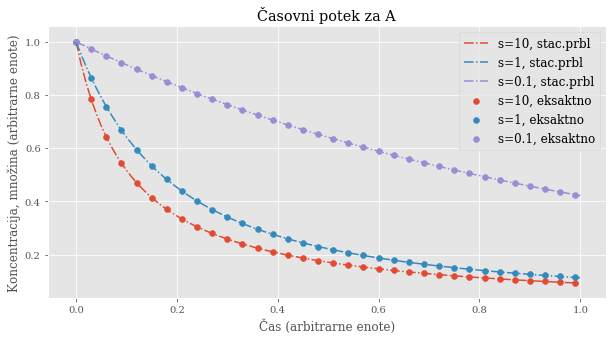

In [6]:
def ssa(s, A_0 = 1,
             A_star_0 = 0 ,
             B_0 = 0 ,
             p = 10 ,
             
             ND=100, #Čas opazovanja
             TS=0.5 #Korak
            ):
    INPUT = np.array([A_0,B_0])
    q = 1000 * p
    r = q * A_0 * s
    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((2))
        V = INP
        Y[0] = -p*(V[0])**2/(1+q*V[0]/r)
        Y[1] = p*(V[0])**2*(1-1/(1+r/(q*V[0])))

        return Y   # For odeint

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    return RES, t_range


plt.figure(figsize=(10,5))
sji = [10,1,.1]
for s in sji:
    res, t_range = eksaktno(s, ND = 1, TS=1e-2)
    plt.scatter(t_range[::3], res[:,0][::3], label="s={}, eksaktno".format(s))
    res, t_range = ssa(s, ND=1, TS=1e-2)
    plt.plot(t_range, res[:,0], "-.", label="s={}, stac.prbl".format(s))
plt.xlabel("Čas (arbitrarne enote)")
plt.ylabel("Koncentracija, množina (arbitrarne enote)")
plt.legend(fontsize="large", loc="upper right")
plt.title("Časovni potek za A")
plt.savefig("ssa.pdf")
plt.savefig("ssa.jpg")
plt.show()

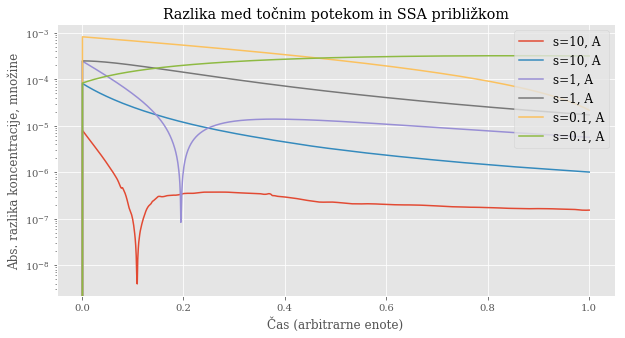

In [7]:
plt.figure(figsize=(10,5))
sji = [10,1,.1]
for s in sji:
    res1, t_range = eksaktno(s, ND = 1, TS=1e-3)
    res2, t_range = ssa(s, ND=1, TS=1e-3)
    res = np.abs(res1[:,[0,2]]-res2)
    plt.plot(t_range, res[:,0], label="s={}, A".format(s))
    plt.plot(t_range, res[:,1], label="s={}, A".format(s))
plt.xlabel("Čas (arbitrarne enote)")
plt.ylabel("Abs. razlika koncentracije, množine")
plt.legend(fontsize="large", loc="upper right")
plt.title("Razlika med točnim potekom in SSA približkom")
plt.semilogy()
plt.savefig("ssaERROR.pdf")
plt.savefig("ssaERROR.jpg")
plt.show()

In [8]:
res = np.abs(res1[:,[0,2]]-res2)

In [9]:
res

array([[0.00000000e+00, 0.00000000e+00],
       [8.24164092e-04, 8.32755118e-05],
       [8.22544184e-04, 8.40116361e-05],
       ...,
       [2.21870816e-05, 3.19576517e-04],
       [2.19000533e-05, 3.19534728e-04],
       [2.16135875e-05, 3.19492708e-04]])